In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers, models
import warnings
import datetime

In [2]:
feature  = pd.read_csv('temps.csv')

In [3]:
feature.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [4]:
print(feature.shape)

(348, 9)


In [5]:
years = feature['year']
months = feature['month']
days = feature['day']
dates=[str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]


In [6]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

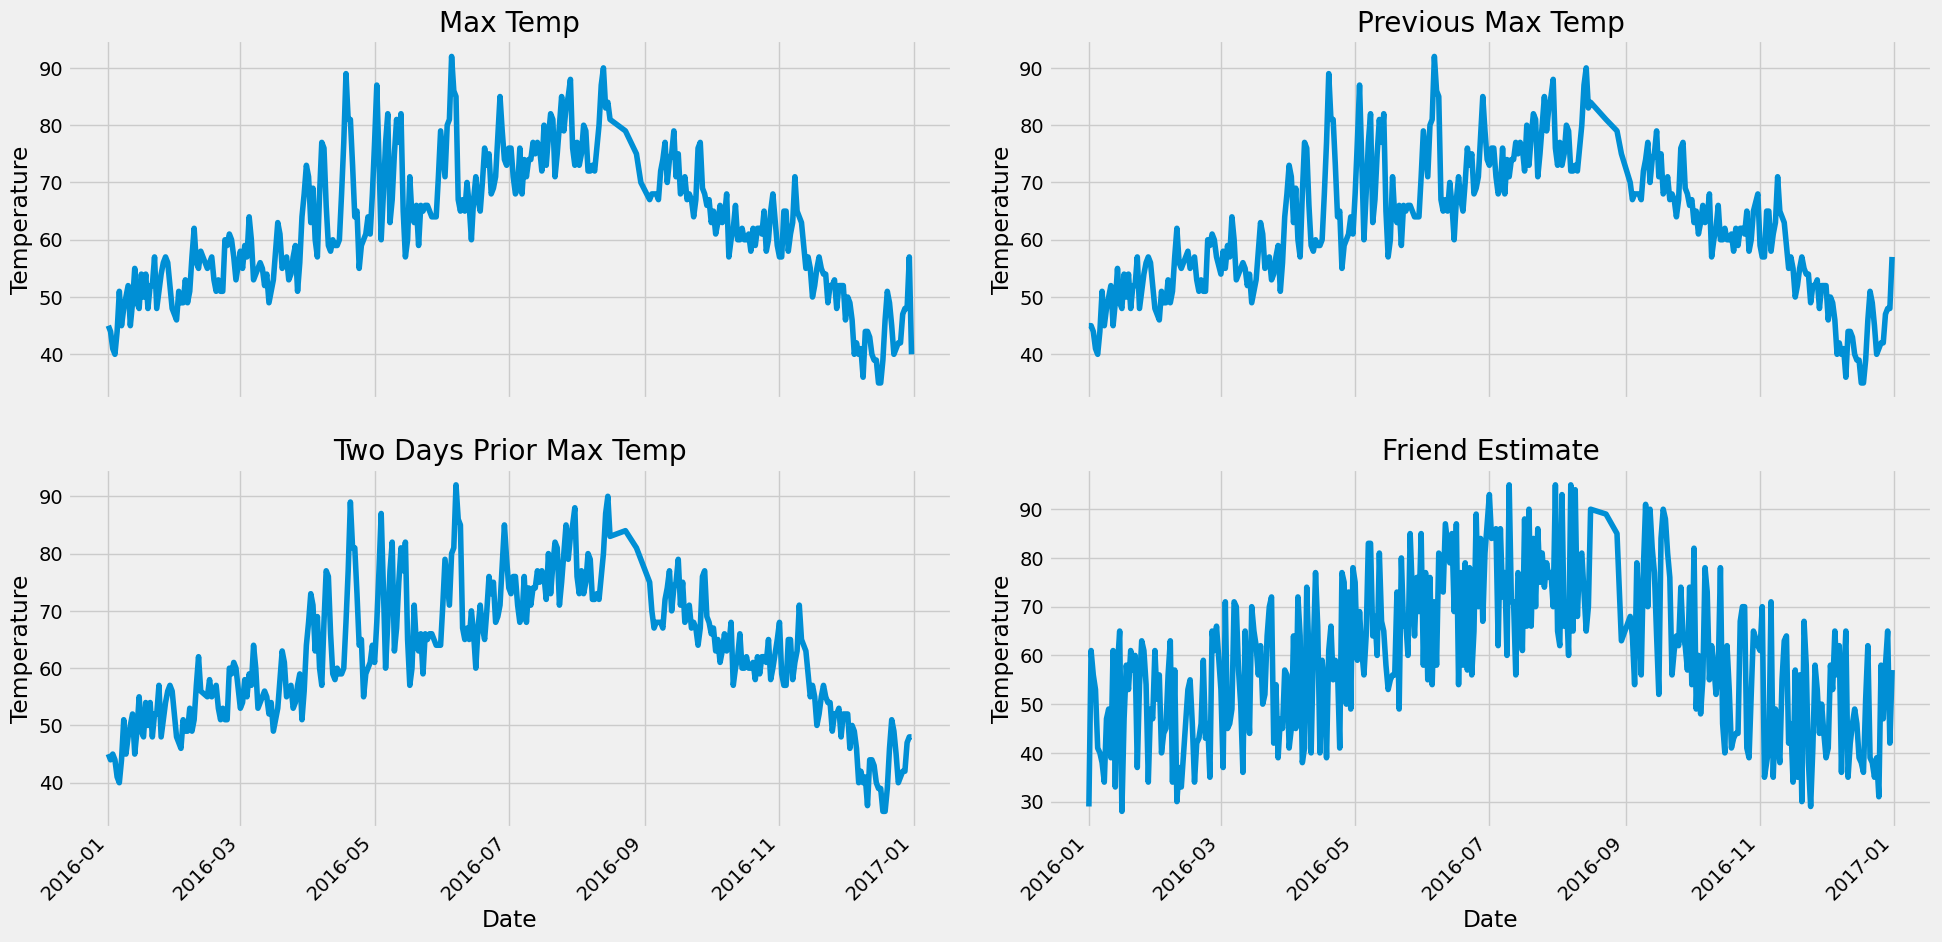

In [7]:
plt.style.use('fivethirtyeight')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

ax1.plot(dates, feature['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

ax2.plot(dates, feature['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

ax3.plot(dates, feature['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

ax4.plot(dates, feature['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')
fig.autofmt_xdate(rotation=45)

plt.tight_layout(pad=2)






In [8]:
features = pd.get_dummies(feature)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [9]:
labels = np.array(features['actual'])

features= features.drop('actual', axis = 1)

feature_list = list(features.columns)

feature_list

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'friend',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [10]:
features = np.array(features)
features.shape

(348, 14)

In [11]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)



In [12]:
input_features[0]

array([ 0.        , -1.5678393 , -1.65682171, -1.48452388, -1.49443549,
       -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
       -0.40482045, -0.40482045, -0.41913682, -0.40482045])

In [13]:
model = models.Sequential()
model.add(layers.Dense(16))
model.add(layers.Dense(32))
model.add(layers.Dense(1))


In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')


In [15]:
model.fit(input_features, labels, validation_split=0.25, epochs=10, batch_size=64)

Epoch 1/10
5/5 [==============================] - 0s 12ms/step - loss: 4220.5044 - val_loss: 3289.2834
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 1678.3308 - val_loss: 4016.1240
Epoch 3/10
5/5 [==============================] - 0s 701us/step - loss: 102.0384 - val_loss: 3024.7666
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 100.7748 - val_loss: 1993.7478
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 112.6132 - val_loss: 1833.1006
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 126.5875 - val_loss: 1581.9001
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 50.7617 - val_loss: 1352.6497
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 42.5089 - val_loss: 1494.8732
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 83.7963 - val_loss: 1076.2158
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 90.8129 - val_loss

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


In [17]:
model = models.Sequential()
model.add(layers.Dense(16,kernel_initializer='random_normal',bias_initializer='zeros',activation='relu'))
model.add(layers.Dense(32,kernel_initializer='random_normal',bias_initializer='zeros',activation='relu'))
model.add(layers.Dense(1,kernel_initializer='random_normal',bias_initializer='zeros',activation='linear'))


In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 0s 8ms/step - loss: 4391.2925 - val_loss: 2874.8210
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 4303.8535 - val_loss: 2796.3943
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 4199.9385 - val_loss: 2697.2898
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 4046.7944 - val_loss: 2509.0947
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 3573.8188 - val_loss: 1921.9177
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 1249.9357 - val_loss: 1040.4777
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 248.4922 - val_loss: 485.3069
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 92.0486 - val_loss: 442.5192
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 54.6980 - val_loss: 405.6374
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 46.2683 -

In [19]:
model = models.Sequential()
model.add(layers.Dense(16,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(layers.Dense(32,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(layers.Dense(1,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))


In [20]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100


5/5 [==============================] - 0s 10ms/step - loss: 4391.0513 - val_loss: 2872.3154
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 4300.0068 - val_loss: 2794.8108
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 4195.0029 - val_loss: 2696.2510
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 4028.1987 - val_loss: 2533.7812
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 3460.6665 - val_loss: 2440.9431
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 614.6533 - val_loss: 1610.2622
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 130.0880 - val_loss: 1395.7806
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 54.0697 - val_loss: 1056.8000
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 62.5696 - val_loss: 708.7285
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 49.5834 - val_loss:

In [21]:
predict = model.predict(input_features)

In [22]:
predict.shape

(348, 1)

In [23]:
dates = [str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

test_dates = [str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predict.reshape(-1)})


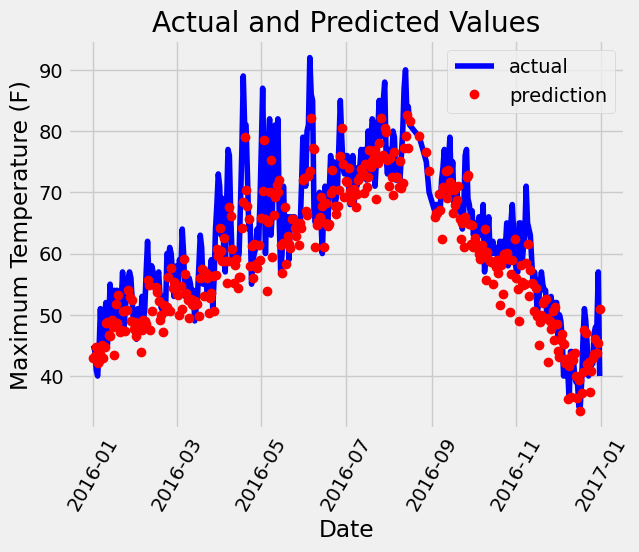

In [24]:
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')


plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60');
plt.legend()

plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');